In [162]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

##### Load image

In [163]:
kidney_img = cv2.imread('Kidney.png', cv2.IMREAD_GRAYSCALE)

##### Display the image in the standard format

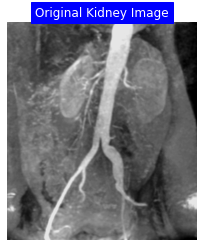

In [164]:
## disable x & y axis
plt.axis('off')
plt.title('Original Kidney Image', color='white', backgroundcolor='blue')
plt.imshow(kidney_img, cmap = 'gray', vmin=0, vmax=2**(kidney_img.itemsize*8)-1)

### Define Spatial Operation Function

In [165]:
def perform_spatial_operation(_img, filter_name: str, kernel_size):
    # Assign filter 
    ## median blur
    if filter_name == 'median':
        return cv2.medianBlur(_img, kernel_size)
    ## average blur
    elif filter_name == 'average':
        return cv2.blur(_img, (kernel_size, kernel_size))
    ## not supported
    raise ValueError('Available filter options: median, average')

In [166]:
median_filtered_img = perform_spatial_operation(kidney_img, 'median', 5)
avg_filtered_img = perform_spatial_operation(kidney_img, 'average', 5)

Text(0.5, 1.0, 'Average Filtered')

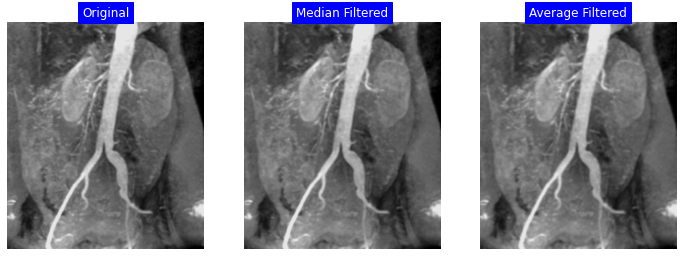

In [167]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(1, 3)

# original image
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')
ax1.imshow(kidney_img, cmap='gray', vmin=0, vmax=2**(kidney_img.itemsize*8)-1)
ax1.set_title('Original', color='white', backgroundcolor='blue')

# median
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')
ax2.imshow(median_filtered_img, cmap='gray', vmin=0, vmax=2**(median_filtered_img.itemsize*8)-1)
ax2.set_title('Median Filtered', color='white', backgroundcolor='blue')

# average
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
ax2.imshow(avg_filtered_img, cmap='gray', vmin=0, vmax=2**(avg_filtered_img.itemsize*8)-1)
ax2.set_title('Average Filtered', color='white', backgroundcolor='blue')

### Laplacian

In [169]:
def perform_laplacian(_img, n: int):
    # assign filter 
    if n == 45:
        kernel = np.array([[1, 1, 1],
                        [1, -8, 1],
                        [1, 1, 1]])
    elif n == 90:
        kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
    # not supported
    else:
        raise ValueError('Available filter options: median, average')
    # apply kernel on the image
    laplacian_img = cv2.filter2D(src=_img, ddepth=-1, kernel=kernel)
    return laplacian_img

In [170]:
filtered_img_45 = perform_laplacian(kidney_img, 45)
filtered_img_90 = perform_laplacian(kidney_img, 90)

Text(0.5, 1.0, 'Laplacian Isotropic Filter = 90')

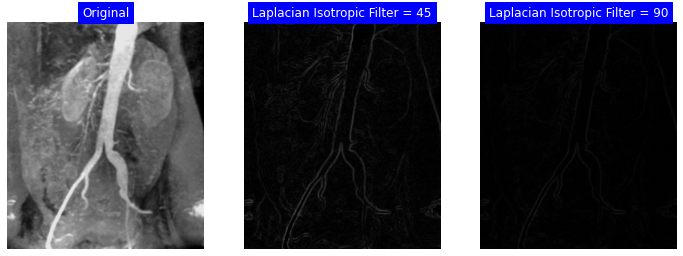

In [171]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(1, 3)

# original image
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')
ax1.imshow(kidney_img, cmap='gray', vmin=0, vmax=2**(kidney_img.itemsize*8)-1)
ax1.set_title('Original', color='white', backgroundcolor='blue')

# laplacian isotropic filter = 45
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')
ax2.imshow(filtered_img_45, cmap='gray', vmin=0, vmax=2**(filtered_img_45.itemsize*8)-1)
ax2.set_title('Laplacian Isotropic Filter = 45', color='white', backgroundcolor='blue')

# laplacian isotropic filter = 90
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
ax2.imshow(filtered_img_90, cmap='gray', vmin=0, vmax=2**(filtered_img_90.itemsize*8)-1)
ax2.set_title('Laplacian Isotropic Filter = 90', color='white', backgroundcolor='blue')